In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [4]:
df = pd.read_csv("cars_data.csv")

In [5]:
display(df.head())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
display(df.tail())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [7]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [14]:
df = df.drop(['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size'], axis=1)
df.head(5)


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [16]:
df = df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Total Cylinders",
                        "Transmisson Type": "Mechanism",
                        "Driven_Wheels":"Drive Mode","higway MPG": "MPG-H",
                        "city mpg":"MPG-C","MSRP":"Price"})

In [17]:
df.shape

(11914, 10)

In [18]:
df.count()

Make                 11914
Model                11914
Year                 11914
HP                   11845
Total Cylinders      11884
Transmission Type    11914
Drive Mode           11914
highway MPG          11914
MPG-C                11914
Price                11914
dtype: int64

In [20]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: " , duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [21]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Total Cylinders,Transmission Type,Drive Mode,highway MPG,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [22]:
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
HP                   69
Total Cylinders      30
Transmission Type     0
Drive Mode            0
highway MPG           0
MPG-C                 0
Price                 0
dtype: int64


In [24]:
df = df.dropna()
df.count()

Make                 10827
Model                10827
Year                 10827
HP                   10827
Total Cylinders      10827
Transmission Type    10827
Drive Mode           10827
highway MPG          10827
MPG-C                10827
Price                10827
dtype: int64

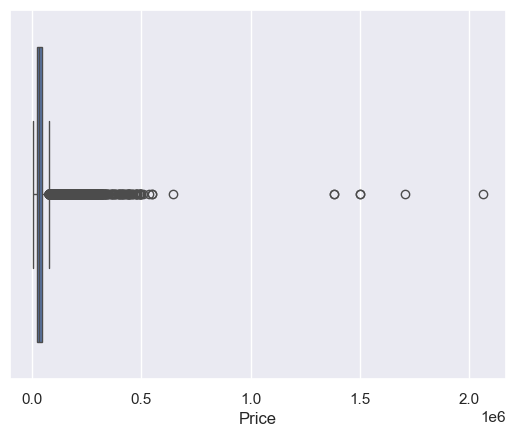

In [29]:
sns.boxplot(x=df['Price'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

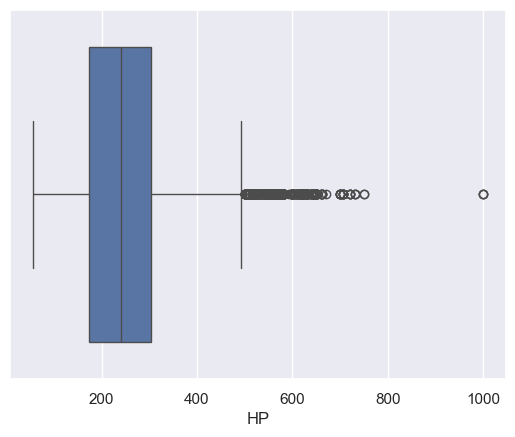

In [31]:
sns.boxplot(x=df['HP'])
plt.show

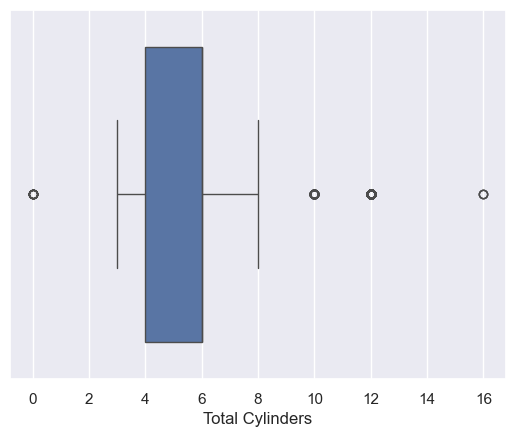

In [32]:
sns.boxplot(x=df['Total Cylinders'])
plt.show()

In [37]:
numeric_cols = df.select_dtypes(include='number').columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3-Q1

condition = ~((df[numeric_cols] < (Q1-1.5*IQR)) | (df[numeric_cols] > (Q3 +1.5 *IQR))).any(axis=1)

df_cleaned = df[condition]
print(df_cleaned.shape)

(9191, 10)


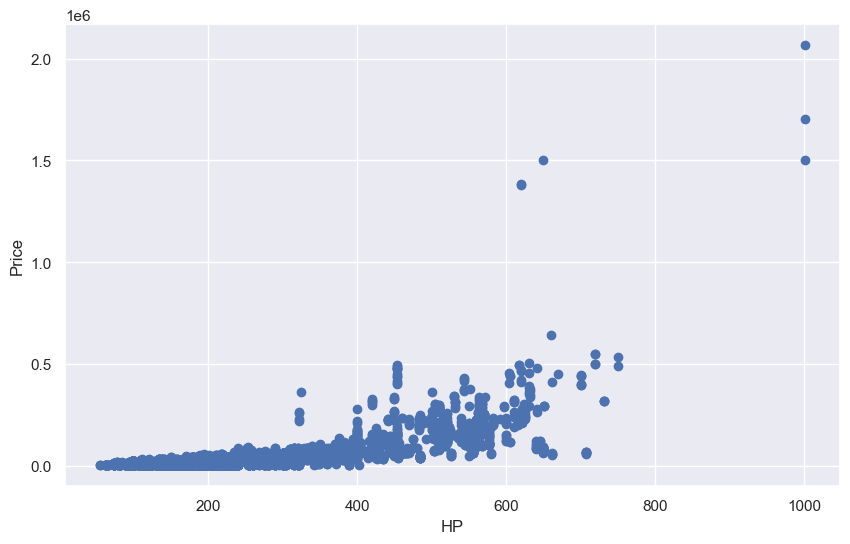

In [39]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'],df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

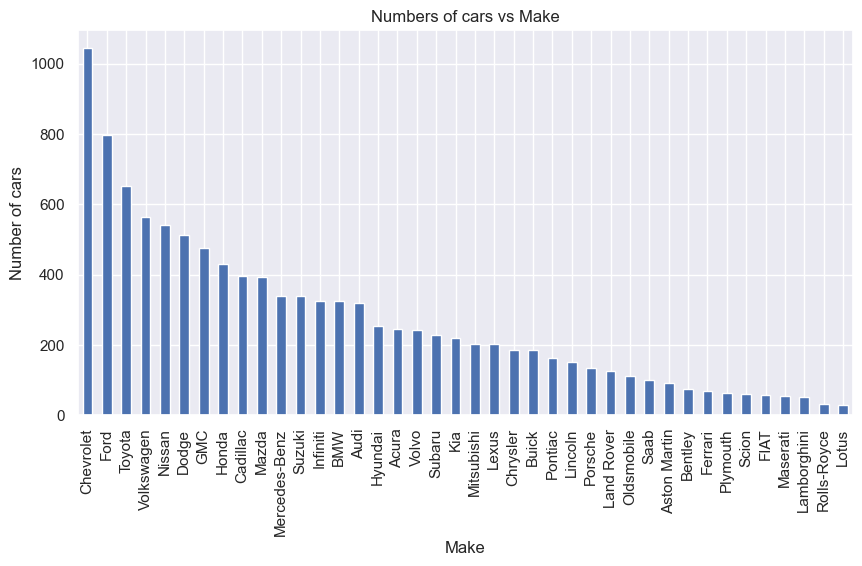

In [41]:
df.Make.value_counts().nlargest(40).plot(kind = 'bar',figsize=(10,5))
plt.title("Numbers of cars vs Make")
plt.ylabel('Number of cars')
plt.show()

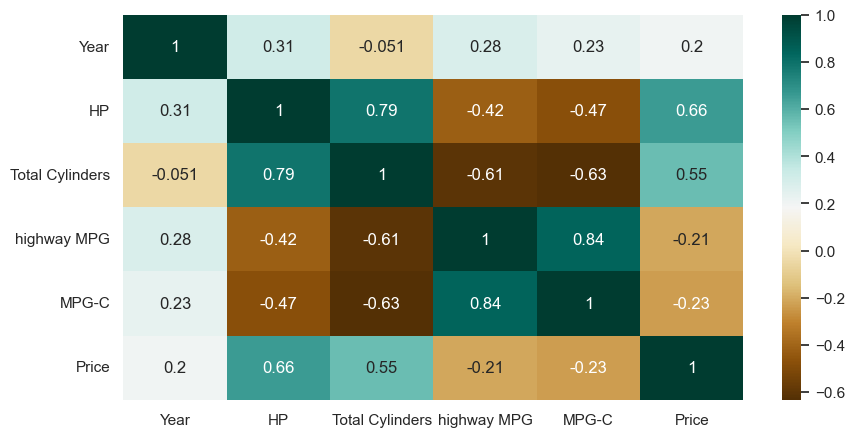

In [43]:
numeric_df = df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,5))
c = numeric_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

plt.show()